In [133]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thai-gdp/thailand-gdp-gross-domestic-product.csv
/kaggle/input/bk-aqi/bangkok-air-quality.csv


In [134]:
df=pd.read_csv("/kaggle/input/bk-aqi/bangkok-air-quality.csv")
# aqicn.org

In [135]:
print(df.head())

       date  pm25  pm10   o3  no2  so2  co
0  2024/3/1    83    48   22    1         
1  2024/3/2    96    56   23    2         
2  2024/3/3    95    57   23    2         
3  2024/3/4    90    59   28    2         
4  2024/3/5    86    61   31    4         


In [136]:
print(df.columns.tolist())
df[' pm25'] = pd.to_numeric(df[' pm25'], errors='coerce')
df[' pm10'] = pd.to_numeric(df[' pm10'], errors='coerce')

['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']


In [140]:
import pandas as pd

# Assuming df is your DataFrame with a 'date' column containing datetime values
# Convert 'date' column to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['date'])

# Replace the 'date' column with the year only
df['date'] = df['date'].dt.year

print(df)

# pm25_by_year = df.groupby(df['date'])[' pm25'].mean()
pm10_by_year = df.groupby(df['date'])[' pm10'].mean()

# # print(pm25_by_year)
# print(pm10_by_year)

      date   pm25   pm10   o3  no2  so2   co
0     2024   83.0   48.0   22    1          
1     2024   96.0   56.0   23    2          
2     2024   95.0   57.0   23    2          
3     2024   90.0   59.0   28    2          
4     2024   86.0   61.0   31    4          
...    ...    ...    ...  ...  ...  ...  ...
3721  2015    NaN    NaN   23   13    3    9
3722  2014    NaN    NaN   40   36    4   11
3723  2013    NaN    NaN   68   33    3    7
3724  2014    NaN    NaN   54   53    6   18
3725  2016    NaN    NaN        23         8

[3726 rows x 7 columns]


In [76]:
# print(type(pm25_by_year))
# pm25_by_year_df = pm25_by_year.to_frame()
# print(type(pm25_by_year_df))
# print(pm25_by_year_df[' pm25'])
# pm25_by_year.index.name = 'Year'  # Assigning a name to the index column
# pm25_by_year_df = pm25_by_year.to_frame()
# print(pm25_by_year_df.columns.tolist())
# print(pm25_by_year_df[' pm25'])
# pm25_by_year_df = pm25_by_year_df.reset_index()  # Resetting the index
# pm25_by_year_df = pm25_by_year_df.rename(columns={' pm25': 'pm25'})
print(pm25_by_year_df['pm25'])

0            NaN
1            NaN
2            NaN
3      88.470968
4      89.570637
5      87.445055
6      83.415978
7      76.978022
8      75.989041
9      73.821918
10     83.230137
11    104.862500
Name: pm25, dtype: float64


In [103]:
pm10_by_year = df.groupby(df['date'])[' pm10'].mean()
# print(pm10_by_year)
# print(type(pm25_by_year))
# pm10_by_year_df = pm10_by_year.to_frame()

# # print(type(pm25_by_year_df))
# # print(pm25_by_year_df[' pm25'])
# pm10_by_year.index.name = 'Year'
# pm10_by_year_df = pm10_by_year_df.reset_index()
# pm10_by_year_df = pm10_by_year_df.rename(columns={' pm10': 'pm10'})
# Assigning a name to the index column
print(pm10_by_year_df['pm10'])
# # pm25_by_year_df = pm25_by_year.to_frame()
# # print(pm25_by_year_df.columns.tolist())
# # print(pm25_by_year_df[' pm25'])
# pm10_by_year_df = pm10_by_year_df.reset_index()  # Resetting the index
# pm10_by_year_df = pm10_by_year_df.rename(columns={' pm10': 'pm10'})
# print(pm10_by_year_df['pm10'])

# print(pm10_by_year)

0           NaN
1     40.363889
2     33.837017
3     35.883978
4     38.513812
5     43.939560
6     40.887052
7     37.164835
8     38.112329
9     39.263014
10    47.109589
11    52.784810
Name: pm10, dtype: float64


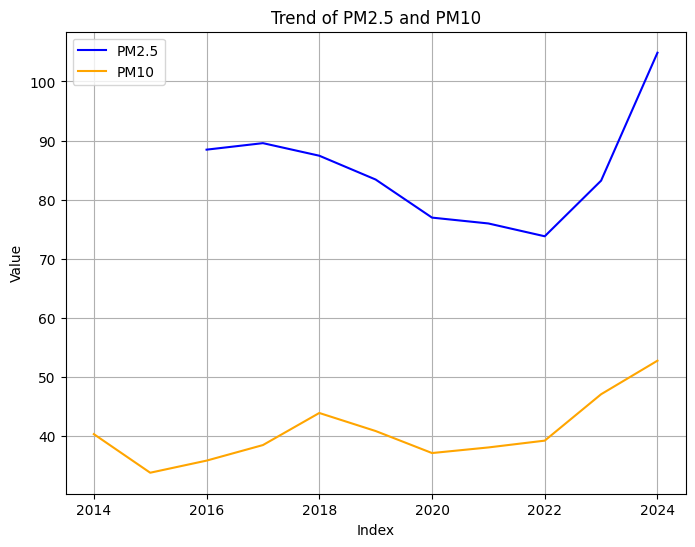

In [107]:
correlation = df[' pm10'].corr(df[' pm25'])
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with numeric columns 'pm25' and 'pm10'
plt.figure(figsize=(8, 6))
pm10_by_year_df
# Plotting the first line (pm25) in blue color
plt.plot(pm25_by_year_df['Year'], pm25_by_year_df['pm25'], color='blue', label='PM2.5')
plt.plot(pm25_by_year_df['Year'], pm10_by_year_df['pm10'], color='orange', label='PM10')

# Plotting the second line (pm10) in green color
# plt.plot(df['date'], df[' pm10'], color='orange', label='PM10')

plt.title('Trend of PM2.5 and PM10')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()



In [127]:
# df_gdp=pd.read_csv("/kaggle/input/thai-gdp/thailand-gdp-gross-domestic-product.csv")
# print(df_gdp.head())
# df_gdp_by_year['date'] = df_gdp['date'].dt.year

# pm10_by_year = df_gdp_by_year.groupby(df_gdp_by_year['date'])[' pm10'].mean()
# print(df_gdp.columns.tolist())
# df_gdp.columns = ['date', 'gdp', 'gdppc', 'annualChange']
# print(df_gdp.columns.tolist())
# df_gdp['date'] = pd.to_datetime(df_gdp['date'])
# df_gdp['date'] = df_gdp['date'].dt.year
# print(df_gdp.head())
df_gdp = df_gdp[(df_gdp['date'] >= 2010) & (df_gdp['date'] <= 2024)]
print(df_gdp)


    date         gdp      gdppc  annualChange
50  2010  341.104766  4996.3721        7.5134
51  2011  370.818736  5396.6435        0.8401
52  2012  397.558330  5748.6328        7.2428
53  2013  420.333659  6041.1340        2.6875
54  2014  407.339036  5822.3777        0.9845
55  2015  401.296242  5708.7941        3.1340
56  2016  413.366346  5854.4639        3.4352
57  2017  456.356813  6436.7896        4.1777
58  2018  506.754212  7124.5589        4.2229
59  2019  543.976696  7628.5761        2.1146
60  2020  500.457262  7001.7854       -6.0669
61  2021  505.568057  7060.8976        1.4921
62  2022  495.340593  6908.8021        2.5947


In [256]:
min_gdp = df_gdp['gdp'].min()
max_gdp = df_gdp['gdp'].max()
df_gdp['scaled_gdp'] = 20 * (df_gdp['gdp'] - min_gdp) / (max_gdp - min_gdp)

In [150]:
min_gdppc = df_gdp['gdppc'].min()
max_gdppc = df_gdp['gdppc'].max()
df_gdp['scaled_gdppc'] = 10 * (df_gdp['gdppc'] - min_gdppc) / (max_gdppc - min_gdppc)

In [163]:
min_annualChange = df_gdp['annualChange'].min()
max_annualChange = df_gdp['annualChange'].max()
df_gdp['scaled_annualChange'] = 20 * (df_gdp['annualChange'] - min_annualChange) / (max_annualChange - min_annualChange)

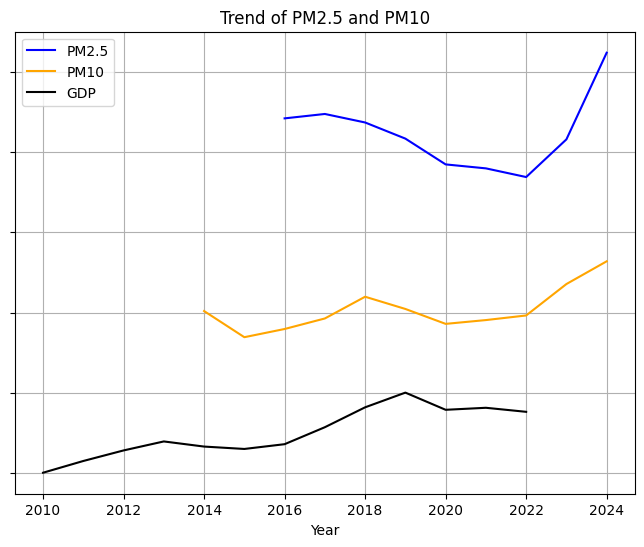

In [297]:
plt.figure(figsize=(8, 6))
pm10_by_year_df
# Plotting the first line (pm25) in blue color
plt.plot(pm25_by_year_df['Year'], pm25_by_year_df['pm25'], color='blue', label='PM2.5')
plt.plot(pm25_by_year_df['Year'], pm10_by_year_df['pm10'], color='orange', label='PM10')
# plt.plot(df_gdp['date'], df_gdp['scaled_gdp'], color='red', label='GDP')
# plt.plot(df_gdp['date'], df_gdp['scaled_gdppc'], color='pink', label='GDPPC')
plt.plot(df_gdp['date'], df_gdp['scaled_gdp'], color='black', label='GDP')

# plt.plot(df_gdp['date'], df_gdp['gdppc'], color='pink', label='GDPPC')

# Plotting the second line (pm10) in green color
# plt.plot(df['date'], df[' pm10'], color='orange', label='PM10')

plt.title('Trend of PM2.5 and PM10')
plt.xlabel('Year')
plt.ylabel('')
plt.gca().set_yticklabels([])

plt.legend()
plt.grid(True)
plt.show()

In [257]:
# df_gdp['scaled_gdp'] = 10 * (df_gdp['gdp'] - min_annualChange) / (max_annualChange - min_annualChange)
df_gdp_cal = df_gdp[(df_gdp['date'] >= 2015) & (df_gdp['date'] <= 2023)]
# print(df_gdp_cal)

In [233]:
pm10_by_year_df_cal = pm10_by_year_df[(pm10_by_year_df['date'] >= 2014) & (pm10_by_year_df['date'] <= 2021)]

print(pm10_by_year_df_cal)

   date       pm10
1  2014  40.363889
2  2015  33.837017
3  2016  35.883978
4  2017  38.513812
5  2018  43.939560
6  2019  40.887052
7  2020  37.164835
8  2021  38.112329


In [265]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming df is your DataFrame with independent variable 'X' and dependent variable 'y'
# For example, if 'X' is 'annualChange' and 'y' is 'pm10' from the concatenated DataFrame
X = df_gdp_cal[['scaled_gdp']]  # Feature (independent variable)
y = pm10_by_year_df_cal['pm10']  # Target (dependent variable)
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

df_gdp_cal_reset = df_gdp_cal.reset_index(drop=True)
pm10_by_year_df_cal_reset = pm10_by_year_df_cal.reset_index(drop=True)
# Once the model is trained, you can use it to make predictions or access its parameters.
# print(df_gdp_cal_reset.columns)
correlation = df_gdp_cal_reset['scaled_gdp'].corr(pm10_by_year_df_cal_reset['pm10'])
print('correlation: ', correlation)

correlation:  0.5345068363418702


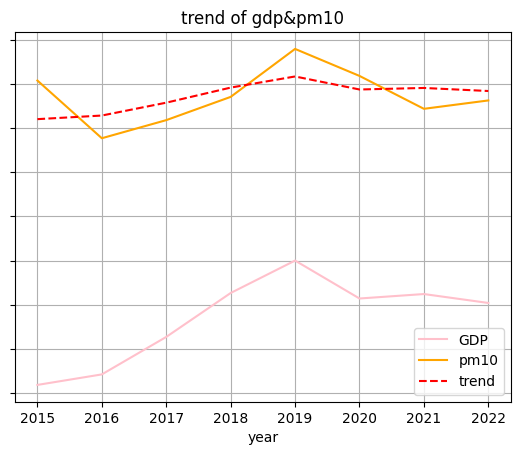

In [263]:
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions
predictions = model.predict(X)

# Plot data points
# plt.scatter(df_gdp_cal['date'], y, color='pink', label='pm10')
plt.plot(df_gdp_cal['date'].squeeze(), X, color='pink', label='GDP')
plt.plot(df_gdp_cal['date'].squeeze(), y, color='orange', label='pm10')
plt.plot(df_gdp_cal['date'].squeeze(), predictions, color='red', label='trend', linestyle='--')
# Add labels and title
plt.xlabel('year')
plt.gca().set_yticklabels([])
# plt.ylabel('pm10')
plt.title('trend of gdp&pm10')
plt.legend()
plt.grid(True)
# Show plot
plt.show()


In [285]:
# print(pm25_by_year_df)
pm25_by_year_df_cal = pm25_by_year_df[(pm25_by_year_df['Year'] >= 2016) & (pm25_by_year_df['Year'] <= 2022)]
df_gdp_cal_25 = df_gdp[(df_gdp['date'] >= 2015) & (df_gdp['date'] <= 2021)]

# print(pm25_by_year_df_cal)
pm25_by_year_df_cal_reset = pm25_by_year_df_cal.reset_index(drop=True)
df_gdp_cal_25_reset = df_gdp_cal.reset_index(drop=True)

correlation = df_gdp_cal_25_reset['scaled_gdp'].corr(pm25_by_year_df_cal_reset['pm25'])
correlation = df_gdp_cal_25_reset['scaled_gdp'].corr(pm25_by_year_df_cal_reset['pm25'])

print(correlation)

-0.8364381610393588


correlation:  -0.8364381610393588


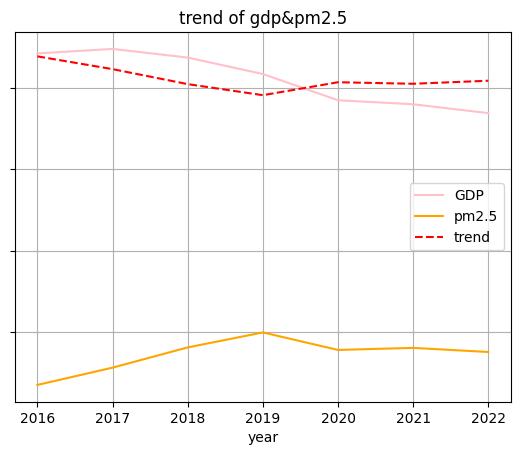

In [286]:
from sklearn.linear_model import LinearRegression
import pandas as pd
pm25_by_year_df_cal = pm25_by_year_df[(pm25_by_year_df['Year'] >= 2016) & (pm25_by_year_df['Year'] <= 2022)]
df_gdp_cal_25 = df_gdp[(df_gdp['date'] >= 2016) & (df_gdp['date'] <= 2022)]

pm25_by_year_df_cal_reset = pm25_by_year_df_cal.reset_index(drop=True)
df_gdp_cal_25_reset = df_gdp_cal.reset_index(drop=True)

X = df_gdp_cal_25[['scaled_gdp']]  # Feature (independent variable)
y = pm25_by_year_df_cal['pm25']  # Target (dependent variable)
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# df_gdp_cal_25_reset = df_gdp_cal_25.reset_index(drop=True)
# pm25_by_year_df_cal_reset = pm25_by_year_df_cal.reset_index(drop=True)
# Once the model is trained, you can use it to make predictions or access its parameters.
# print(df_gdp_cal_reset.columns)
correlation = df_gdp_cal_25_reset['scaled_gdp'].corr(pm25_by_year_df_cal_reset['pm25'])
print('correlation: ', correlation)
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions
predictions = model.predict(X)

# Plot data points
# plt.scatter(df_gdp_cal['date'], y, color='pink', label='pm10')
plt.plot(df_gdp_cal_25['date'].squeeze(), pm25_by_year_df_cal[['pm25']], color='pink', label='GDP')
plt.plot(df_gdp_cal_25['date'].squeeze(), df_gdp_cal_25['scaled_gdp'], color='orange', label='pm2.5')
plt.plot(df_gdp_cal_25['date'].squeeze(), predictions, color='red', label='trend', linestyle='--')
# Add labels and title
plt.xlabel('year')
plt.gca().set_yticklabels([])
# plt.ylabel('pm10')
plt.title('trend of gdp&pm2.5')
plt.legend()
plt.grid(True)
# Show plot
plt.show()


In [19]:
str_gdp = """Date,Q,Actual
Feb18-2024,(Q4),-0.60
Nov19-2023,(Q3),0.80
Aug20-2023,(Q2),0.20
May14-2023,(Q1),1.90%
Feb16-2023,(Q4),-1.50
Nov20-2022,(Q3),1.20
Aug14-2022,(Q2),0.70
May16-2022,(Q1),1.10
Feb20-2022,(Q4),1.80
Nov14-2021,(Q3),-1.10
Aug15-2021,(Q2),0.40
May16-2021,(Q1),0.20
Feb14-2021,(Q4),1.30
Nov15-2020,(Q3),6.50
Aug16-2020,(Q2),-9.70
May17-2020,(Q1),-2.20
Feb16-2020,(Q4),0.20
Nov17-2019,(Q3),0.10
Aug18-2019,(Q2),0.60
May20-2019,(Q1),1.00
Feb17-2019,(Q4),0.80
Nov18-2018,(Q3),0.00
Aug19-2018,(Q2),1.00
May20-2018,(Q1),2.00
Feb18-2018,(Q4),0.50
Nov19-2017,(Q3),1.00
Aug20-2017,(Q2),1.30
May14-2017,(Q1),1.30
Feb19-2017,(Q4),0.40
Nov20-2016,(Q3),0.60
Aug14-2016,(Q2),0.80
May15-2016,(Q1),0.90
Feb14-2016,(Q4),0.80
Nov15-2015,(Q3),1.00
Aug16-2015,(Q2),0.40
May17-2015,(Q1),0.30
Feb15-2015,(Q4),1.70
Nov16-2014,(Q3),1.10
Aug17-2014,(Q2),0.90"""

# Create DataFrame
lines = str_gdp.split('\n')

# Split each line into columns
data = [line.split(',') for line in lines]

# Create DataFrame
qgdp_df = pd.DataFrame(data[1:], columns=data[0])

yeas = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
for i in yeas:
        qgdp_df['Date'] = [i if i in date else date for date in qgdp_df['Date']]
qgdp_df = qgdp_df.sort_values(by='Date')

qgdp_df['Actual'] = qgdp_df['Actual'].str.rstrip('%').astype(float)
print(qgdp_df)


    Date     Q  Actual
38  2014  (Q2)     0.9
37  2014  (Q3)     1.1
35  2015  (Q1)     0.3
34  2015  (Q2)     0.4
33  2015  (Q3)     1.0
36  2015  (Q4)     1.7
32  2016  (Q4)     0.8
31  2016  (Q1)     0.9
30  2016  (Q2)     0.8
29  2016  (Q3)     0.6
25  2017  (Q3)     1.0
27  2017  (Q1)     1.3
26  2017  (Q2)     1.3
28  2017  (Q4)     0.4
24  2018  (Q4)     0.5
23  2018  (Q1)     2.0
22  2018  (Q2)     1.0
21  2018  (Q3)     0.0
20  2019  (Q4)     0.8
19  2019  (Q1)     1.0
17  2019  (Q3)     0.1
18  2019  (Q2)     0.6
16  2020  (Q4)     0.2
15  2020  (Q1)    -2.2
14  2020  (Q2)    -9.7
13  2020  (Q3)     6.5
12  2021  (Q4)     1.3
11  2021  (Q1)     0.2
10  2021  (Q2)     0.4
9   2021  (Q3)    -1.1
5   2022  (Q3)     1.2
8   2022  (Q4)     1.8
7   2022  (Q1)     1.1
6   2022  (Q2)     0.7
4   2023  (Q4)    -1.5
3   2023  (Q1)     1.9
2   2023  (Q2)     0.2
1   2023  (Q3)     0.8
0   2024  (Q4)    -0.6


In [21]:
# Using the + operator
qgdp_df['DateQ'] = qgdp_df['Date'] + qgdp_df['Q']

# Using pd.Series.str.cat() method
qgdp_df['DateQ'] = qgdp_df['Date'].astype(str).str.cat(qgdp_df['Q'].astype(str), sep='')

print(qgdp_df.head())

    Date     Q  Actual     DateQ
38  2014  (Q2)     0.9  2014(Q2)
37  2014  (Q3)     1.1  2014(Q3)
35  2015  (Q1)     0.3  2015(Q1)
34  2015  (Q2)     0.4  2015(Q2)
33  2015  (Q3)     1.0  2015(Q3)


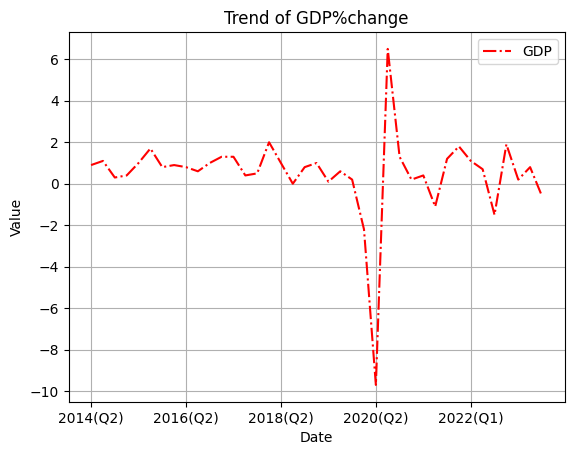

In [132]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to a pandas datetime object
# qgdp_df['Date'] = pd.to_datetime(qgdp_df['Date'])

# Plot the data
plt.plot(qgdp_df['DateQ'], qgdp_df['Actual'], color='red', label='GDP', linestyle="-.")
# plt.plot(qgdp_df['DateQ'], qgdp_df['Q'], color='orange', label='pm2.5')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')  # You can replace 'Value' with appropriate labels
plt.title('Trend of GDP%change')
plt.legend()
plt.grid(True)
plt.xticks(qgdp_df['DateQ'][::8])
# plt.yticks(range(-3, 3))
# Show plot
plt.show()


In [179]:
import pandas as pd

# Assuming df and qgdp_df are your DataFrames

# # Filter rows from df that match the date range
# df_qgdp_pm10 = df[(df['date'] >= 2014) & (df['date'] <= 2023)]
# df_qgdp_pm10 = df_qgdp_pm10.sort_values(by='date')

# # Merge qgdp_df with df_qgdp_pm10 using left join
# df_qgdp_pm10.reset_index(drop=True, inplace=True)
# qgdp_df.reset_index(drop=True, inplace=True)

# # Merge qgdp_df with df_qgdp_pm10 using left join
# merged_df = pd.concat([df_qgdp_pm10, qgdp_df], axis=1)

# print(merged_df)
import pandas as pd

# Assuming df_bangkok is your DataFrame
df_bangkok = pd.read_csv("/kaggle/input/bk-aqi/bangkok-air-quality.csv")

# Checking if 'date' column is datetime type
if pd.api.types.is_datetime64_any_dtype(df_bangkok['date']):
    print("The 'date' column is of datetime type.")
else:
    # Try to convert to datetime
    try:
        df_bangkok['date'] = pd.to_datetime(df_bangkok['date'])
        print("Successfully converted 'date' column to datetime type.")
    except:
        print("Conversion to datetime failed. 'date' column might not contain datetime values.")

df_bangkok_sorted = df_bangkok.sort_values(by='date')    
quantile_labels = pd.qcut(df_bangkok_sorted['date'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Create a new DataFrame with 'date' column replaced by quantile labels
new_qgdp_df = df_bangkok_sorted.copy()
new_qgdp_df['quantile'] = quantile_labels

new_qgdp_df['DateQ'] = new_qgdp_df['date'].dt.year.astype(str) +"(" +new_qgdp_df['quantile'].astype(str)+")"
# df['date'] = df['date'].dt.year
new_qgdp_df['pm10'] = pd.to_numeric(new_qgdp_df[' pm10'], errors='coerce')
pm10_by_quantile = new_qgdp_df.groupby('DateQ')['pm10'].mean()# qgdp_by_year = new_qgdp_df.groupby(new_qgdp_df['DateQ'])[' pm10'].mean()

new_qgdp_df['pm25'] = pd.to_numeric(new_qgdp_df[' pm25'], errors='coerce')
pm25_by_quantile = new_qgdp_df.groupby('DateQ')['pm25'].mean()# qgdp_by_year = new_qgdp_df.groupby(new_qgdp_df['DateQ'])[' pm10'].mean()

new_qgdp_df['o3'] = pd.to_numeric(new_qgdp_df[' o3'], errors='coerce')
o3_by_quantile = new_qgdp_df.groupby('DateQ')['o3'].mean()# qgdp_by_year = new_qgdp_df.groupby(new_qgdp_df['DateQ'])[' pm10'].mean()

new_qgdp_df['no2'] = pd.to_numeric(new_qgdp_df[' no2'], errors='coerce')
no2_by_quantile = new_qgdp_df.groupby('DateQ')['no2'].mean()# qgdp_by_year = new_qgdp_df.groupby(new_qgdp_df['DateQ'])[' pm10'].mean()

new_qgdp_df['so2'] = pd.to_numeric(new_qgdp_df[' so2'], errors='coerce')
so2_by_quantile = new_qgdp_df.groupby('DateQ')['so2'].mean()# qgdp_by_year = new_qgdp_df.groupby(new_qgdp_df['DateQ'])[' pm10'].mean()

new_qgdp_df['co'] = pd.to_numeric(new_qgdp_df[' co'], errors='coerce')
co_by_quantile = new_qgdp_df.groupby('DateQ')['co'].mean()# qgdp_by_year = new_qgdp_df.groupby(new_qgdp_df['DateQ'])[' pm10'].mean()

merged_df = pd.merge(qgdp_df, pm10_by_quantile, on='DateQ', how='inner')
merged_df = pd.merge(merged_df, pm25_by_quantile, on='DateQ', how='inner')
merged_df = pd.merge(merged_df, o3_by_quantile, on='DateQ', how='inner')
merged_df = pd.merge(merged_df, no2_by_quantile, on='DateQ', how='inner')
merged_df = pd.merge(merged_df, so2_by_quantile, on='DateQ', how='inner')
merged_df = pd.merge(merged_df, co_by_quantile, on='DateQ', how='inner')
new_merged_df = merged_df.sort_values(by='Date')  
print(new_merged_df)

# o3  no2  so2   co
# Now, you can use 'df_bangkok['date']' as a datetime column

# print(merged_df)
# quantile_labels = pd.qcut(df[' pm10'], q=4)  # Split into 4 quantiles
# print(quantile_labels)
# pm10_by_quantile = df.groupby(quantile_labels)[' pm10'].mean()
# print(pm10_by_quantile)

Successfully converted 'date' column to datetime type.
    Date     Q  Actual     DateQ       pm10        pm25         o3        no2  \
0   2015  (Q1)     0.3  2015(Q1)  33.837017         NaN  28.551247  17.299169   
1   2016  (Q1)     0.9  2016(Q1)  35.054187         NaN  31.823529  14.102439   
2   2016  (Q2)     0.8  2016(Q2)  36.943396   88.470968  15.503145  14.383648   
3   2017  (Q2)     1.3  2017(Q2)  38.513812   89.570637  15.157459  12.580110   
4   2018  (Q2)     1.0  2018(Q2)  43.939560   87.445055  15.079670  13.708791   
5   2019  (Q3)     0.1  2019(Q3)  38.288820   78.108696  11.319876  10.363354   
6   2019  (Q2)     0.6  2019(Q2)  61.292683  125.097561  21.170732  19.121951   
7   2020  (Q3)     6.5  2020(Q3)  37.164835   76.978022  12.142857   9.585165   
8   2021  (Q4)     1.3  2021(Q4)  37.418033   73.868852  14.319672   8.327869   
9   2021  (Q3)    -1.1  2021(Q3)  38.460905   77.053498  13.460905   8.868313   
10  2022  (Q4)     1.8  2022(Q4)  39.263014   73.82191

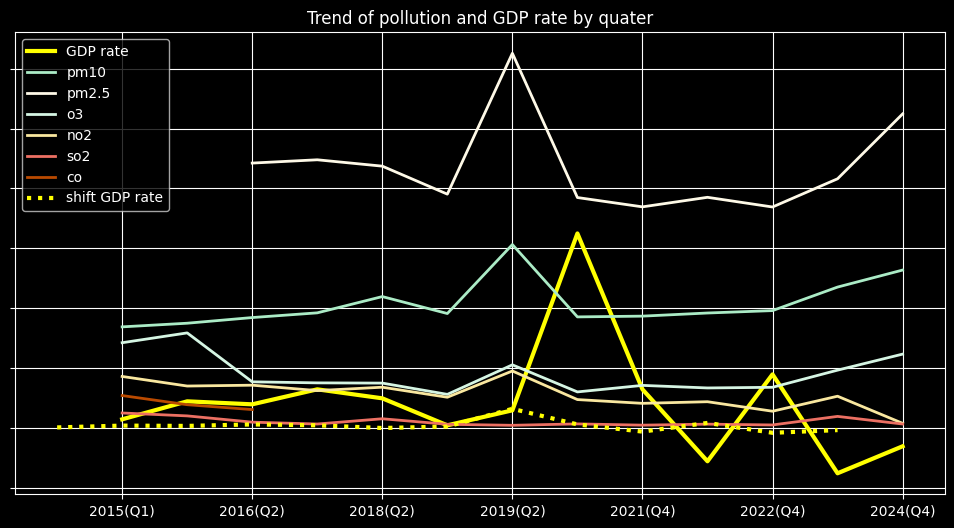

In [277]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to a pandas datetime object
# qgdp_df['Date'] = pd.to_datetime(qgdp_df['Date'])
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))  # Set the width to 12 inches and height to 6 inches
# Plot the data
colors = ['yellow', '#abebc6', '#fef9e7', '#d5f5e3', '#f9e79f', '#ec7063', '#ba4a00']
line_width = 2.0


plt.plot(merged_df['DateQ'], merged_df['Actual']*10, color=colors[0], label='GDP rate', linestyle="-", linewidth=3)
plt.plot(merged_df['DateQ'], merged_df['pm10'], color=colors[1], label='pm10', linestyle="-", linewidth=line_width)
plt.plot(merged_df['DateQ'], merged_df['pm25'], color=colors[2], label='pm2.5', linestyle="-", linewidth=line_width)
plt.plot(merged_df['DateQ'], merged_df['o3'], color=colors[3], label='o3', linestyle="-", linewidth=line_width)
plt.plot(merged_df['DateQ'], merged_df['no2'], color=colors[4], label='no2', linestyle="-", linewidth=line_width)
plt.plot(merged_df['DateQ'], merged_df['so2'], color=colors[5], label='so2', linestyle="-", linewidth=line_width)
plt.plot(merged_df['DateQ'], merged_df['co'], color=colors[6], label='co', linestyle="-", linewidth=line_width)
plt.plot(merged_df.index-1, merged_df['Actual'], color=colors[0], label='shift GDP rate', linestyle=":", linewidth=3)

# plt.plot(qgdp_df['DateQ'], qgdp_df['Q'], color='orange', label='pm2.5')

# Add labels and title
# plt.xlabel('Date')
# plt.ylabel('Value')  # You can replace 'Value' with appropriate labels
plt.title('Trend of pollution and GDP rate by quater')
plt.legend()
plt.grid(True)
plt.xticks(merged_df['DateQ'][::2])
plt.gca().set_yticklabels([])

# plt.yticks(range(-3, 3))
# Show plot
plt.show()


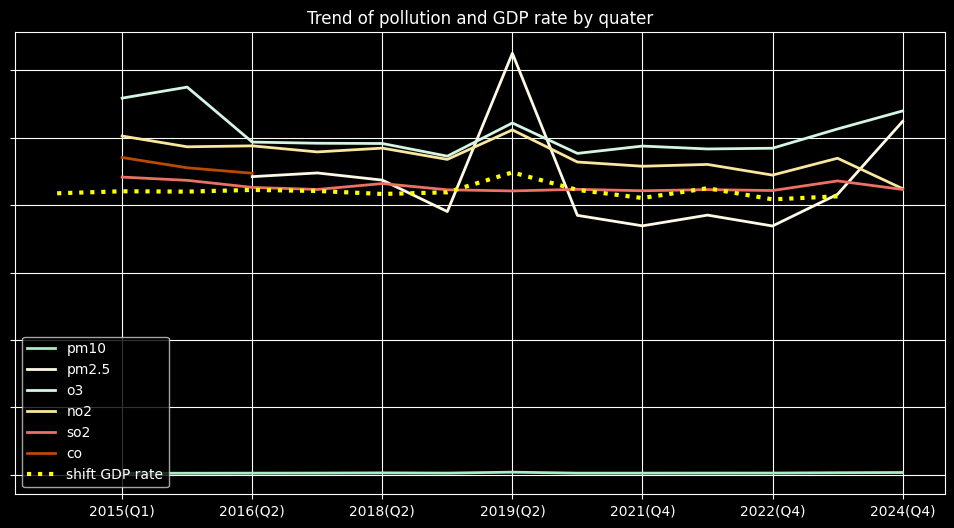

In [262]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to a pandas datetime object
# qgdp_df['Date'] = pd.to_datetime(qgdp_df['Date'])
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))  # Set the width to 12 inches and height to 6 inches
# Plot the data
colors = ['yellow', '#abebc6', '#fef9e7', '#d5f5e3', '#f9e79f', '#ec7063', '#ba4a00']
line_width = 2.0

nan_df = pd.DataFrame(np.nan, index=range(5), columns=merged_df.columns)
# Concatenate nan_df with merged_df
shifted_df = pd.concat([nan_df, merged_df], ignore_index=True)
min_pm25= merged_df['pm25'].median()
ind=100
# plt.plot(merged_df['DateQ'], merged_df['Actual']*10, color=colors[0], label='GDP rate', linestyle="-", linewidth=3)
plt.plot(merged_df['DateQ'], merged_df['pm10']/min_pm25, color=colors[1], label='pm10', linestyle="-", linewidth=line_width)
plt.plot(merged_df['DateQ'], merged_df['pm25'], color=colors[2], label='pm2.5', linestyle="-", linewidth=line_width)
plt.plot(merged_df['DateQ'], merged_df['o3']+min_pm25, color=colors[3], label='o3', linestyle="-", linewidth=line_width)
plt.plot(merged_df['DateQ'], merged_df['no2']+min_pm25, color=colors[4], label='no2', linestyle="-", linewidth=line_width)
plt.plot(merged_df['DateQ'], merged_df['so2']+min_pm25, color=colors[5], label='so2', linestyle="-", linewidth=line_width)
plt.plot(merged_df['DateQ'], merged_df['co']+min_pm25, color=colors[6], label='co', linestyle="-", linewidth=line_width)
plt.plot(merged_df.index-1, merged_df['Actual']+min_pm25, color=colors[0], label='shift GDP rate', linestyle=":", linewidth=3)

# plt.plot(qgdp_df['DateQ'], qgdp_df['Q'], color='orange', label='pm2.5')

# Add labels and title
# plt.xlabel('Date')
# plt.ylabel('Value')  # You can replace 'Value' with appropriate labels
plt.title('Trend of pollution and GDP rate by quater')
plt.legend()
plt.grid(True)
plt.xticks(merged_df['DateQ'][::2])
plt.gca().set_yticklabels([])

# plt.yticks(range(-3, 3))
# Show plot
plt.show()


In [76]:
correlation_matrix_df=merged_df
correlation_matrix_df.drop(columns=['Date'], inplace=True)
correlation_matrix_df.drop(columns=['Q'], inplace=True)
correlation_matrix_df.drop(columns=['DateQ'], inplace=True)
correlation_matrix = correlation_matrix_df.corr()
# Display the correlation matrix
print(correlation_matrix) 

          Actual      pm10      pm25        o3       no2       so2        co
Actual  1.000000 -0.279066 -0.225309 -0.297976  0.001249 -0.240558 -0.834574
pm10   -0.279066  1.000000  0.897287  0.120670  0.020920 -0.275731 -0.270420
pm25   -0.225309  0.897287  1.000000  0.776985  0.419071 -0.100521 -1.000000
o3     -0.297976  0.120670  0.776985  1.000000  0.285128  0.667703  0.136129
no2     0.001249  0.020920  0.419071  0.285128  1.000000  0.435734  0.087907
so2    -0.240558 -0.275731 -0.100521  0.667703  0.435734  1.000000  0.348507
co     -0.834574 -0.270420 -1.000000  0.136129  0.087907  0.348507  1.000000


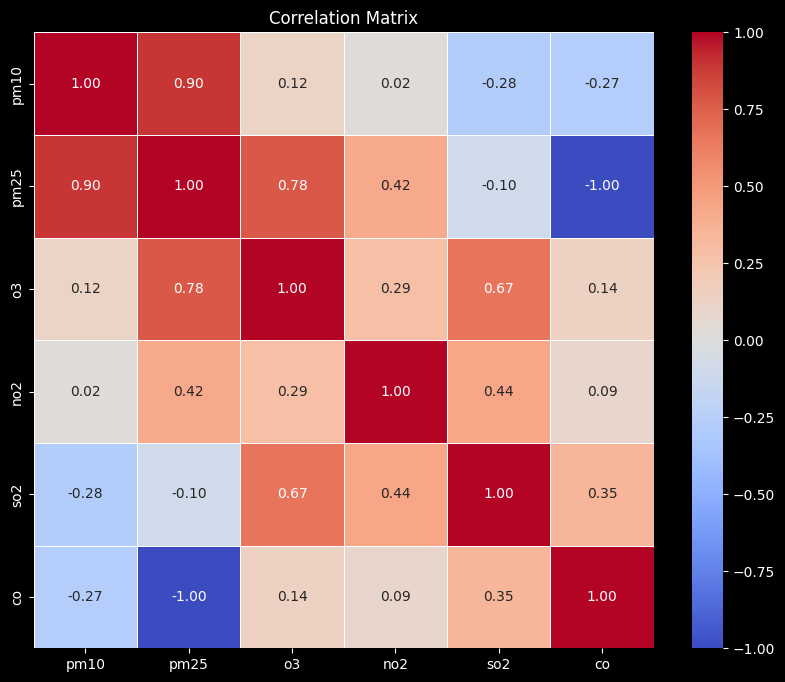

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
# correlation_matrix_df_shift = merged_df.shift(-1)

correlation_matrix_df_shift = merged_df.copy()
correlation_matrix_df_shift.drop(columns=['Date', 'Q', 'DateQ', 'Actual'], inplace=True)
correlation_matrix_df_shift = correlation_matrix_df_shift.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_df_shift, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()


In [419]:
from scipy.stats import pearsonr
# Shift the index of merged_df by -1
correlation_matrix_df_shift = merged_df.shift(-1)

# Calculate correlation between columns 'Actual' in the shifted DataFrame and 'pm10' in the original DataFrame
correlation = correlation_matrix_df_shift['Actual'].corr(merged_df['pm10'])
print(f"Correlation between 'GDP rate' and 'pm10': {correlation}")

correlation = correlation_matrix_df_shift['Actual'].corr(merged_df['pm25'])
print(f"Correlation between 'GDP rate'  and 'pm25': {correlation}")

correlation = correlation_matrix_df_shift['Actual'].corr(merged_df['o3'])
print(f"Correlation between 'GDP rate'  and 'o3': {correlation}")

correlation = correlation_matrix_df_shift['Actual'].corr(merged_df['no2'])
print(f"Correlation between 'GDP rate'  and 'no2': {correlation}")

correlation = correlation_matrix_df_shift['Actual'].corr(merged_df['so2'])
print(f"Correlation between 'GDP rate'  and 'so2': {correlation}")

correlation = correlation_matrix_df_shift['Actual'].corr(merged_df['co'])
print(f"Correlation between 'GDP rate'  and 'co': {correlation}")



Correlation between 'GDP rate' and 'pm10': 0.6581159697632277
Correlation between 'GDP rate'  and 'pm25': 0.8745737308583851
Correlation between 'GDP rate'  and 'o3': 0.1976535669907953
Correlation between 'GDP rate'  and 'no2': 0.6986075045505138
Correlation between 'GDP rate'  and 'so2': -0.19925726152760587
Correlation between 'GDP rate'  and 'co': -0.691946861476423


In [420]:
from scipy.stats import pearsonr
# correlation = correlation_matrix_df_shift['Actual'].corr(merged_df['pm10'])
# >>> x = np.arange(10, 20)
# >>> y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
# >>> scipy.stats.pearsonr(x, y)    # Pearson's r
# print(correlation_matrix_df_shift['Actual'].dropna())
# print(merged_df['pm10'].dropna())
# print(correlation_matrix_df_shift)
# print(correlation_matrix_df_shift['Actual'].dropna())
# print(correlation_matrix_df_shift['pm10'].iloc[:])
# print(correlation_matrix_df_shift['Actual'].dropna().iloc[2:13], correlation_matrix_df_shift['o3'].dropna().iloc[:12])

print('o3',pearsonr(correlation_matrix_df_shift['Actual'].dropna().iloc[2:12], correlation_matrix_df_shift['o3'].dropna().iloc[1:11])
)
print('no2',pearsonr(correlation_matrix_df_shift['Actual'].dropna().iloc[1:], correlation_matrix_df_shift['no2'].iloc[:11])
)
# print('co',pearsonr(correlation_matrix_df_shift['Actual'].dropna().iloc[1:], correlation_matrix_df_shift['co'].iloc[:11])
# )
print('pm10',pearsonr(correlation_matrix_df_shift['Actual'].dropna().iloc[1:], correlation_matrix_df_shift['pm10'].iloc[:11])
)
correlation_matrix_df_shift_=correlation_matrix_df_shift
correlation_matrix_df_shift_['pm25'] = correlation_matrix_df_shift['pm25'].fillna(correlation_matrix_df_shift['pm25'].mean())
correlation_matrix_df_shift_['Actual'] = correlation_matrix_df_shift['Actual'].fillna(correlation_matrix_df_shift['Actual'].mean())

# print(correlation_matrix_df_shift_)

print('pm2.5',pearsonr(correlation_matrix_df_shift_['Actual'].iloc[1:], correlation_matrix_df_shift_['pm25'].iloc[:12])
)
# print(correlation_matrix_df_shift['Actual'].dropna())
# print(merged_df['pm25'].dropna())
# pearsonr(correlation_matrix_df_shift['Actual'].dropna().iloc[3:], merged_df['pm25'].dropna())
# pearsonr(correlation_matrix_df_shift['Actual'].dropna(), merged_df['o3'].iloc[0:12])
# pearsonr(correlation_matrix_df_shift['Actual'].dropna(), merged_df['no2'].iloc[0:12])
# pearsonr(correlation_matrix_df_shift['Actual'].dropna(), merged_df['co'].iloc[0:12])

# df.drop('c')
# merged_df = pd.merge(merged_df, co_by_quantile, on='DateQ', how='inner')
# correlation_matrix_df_shift_n = pd.merge(correlation_matrix_df_shift, merged_df, left_index=True, right_index=True)
# # correlation_matrix_df_shift_n=correlation_matrix_df_shift_n.dropna()
# correlation_matrix_df_shift_n=correlation_matrix_df_shift_n.dropna()
# print(correlation_matrix_df_shift_n)

# pearsonr(correlation_matrix_df_shift_n['Actual_x'].dropna(),  correlation_matrix_df_shift_n['pm10_y'].dropna())

# print(correlation_matrix_df_shift_n)

o3 PearsonRResult(statistic=0.5061035136601899, pvalue=0.1355493059750395)
no2 PearsonRResult(statistic=0.7737850261932127, pvalue=0.005197983157812115)
pm10 PearsonRResult(statistic=0.685735833865007, pvalue=0.01983816066321299)
pm2.5 PearsonRResult(statistic=0.8086987715450411, pvalue=0.0014491222469902143)


In [381]:
print((correlation_matrix_df_shift_['Actual'].iloc[:]))
print((correlation_matrix_df_shift_['pm25'].iloc[:12]))

print('pm2.5',pearsonr(correlation_matrix_df_shift_['Actual'].iloc[1:], correlation_matrix_df_shift_['pm25'].iloc[:12])
)

0     0.900
1     0.800
2     1.300
3     1.000
4     0.100
5     0.600
6     6.500
7     1.300
8    -1.100
9     1.800
10   -1.500
11   -0.600
12    0.925
Name: Actual, dtype: float64
0      87.137077
1      88.470968
2      89.570637
3      87.445055
4      78.108696
5     125.097561
6      76.978022
7      73.868852
8      77.053498
9      73.821918
10     83.230137
11    104.862500
Name: pm25, dtype: float64
pm2.5 PearsonRResult(statistic=0.8086987715450411, pvalue=0.0014491222469902143)
